In [60]:
import pandas as pd
import numpy as np

df = pd.read_csv('Bank_Customer_Churn_Prediction.csv')
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [61]:
df.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

## Visualization Data

In [3]:
import matplotlib.pyplot as plt
import numpy as np

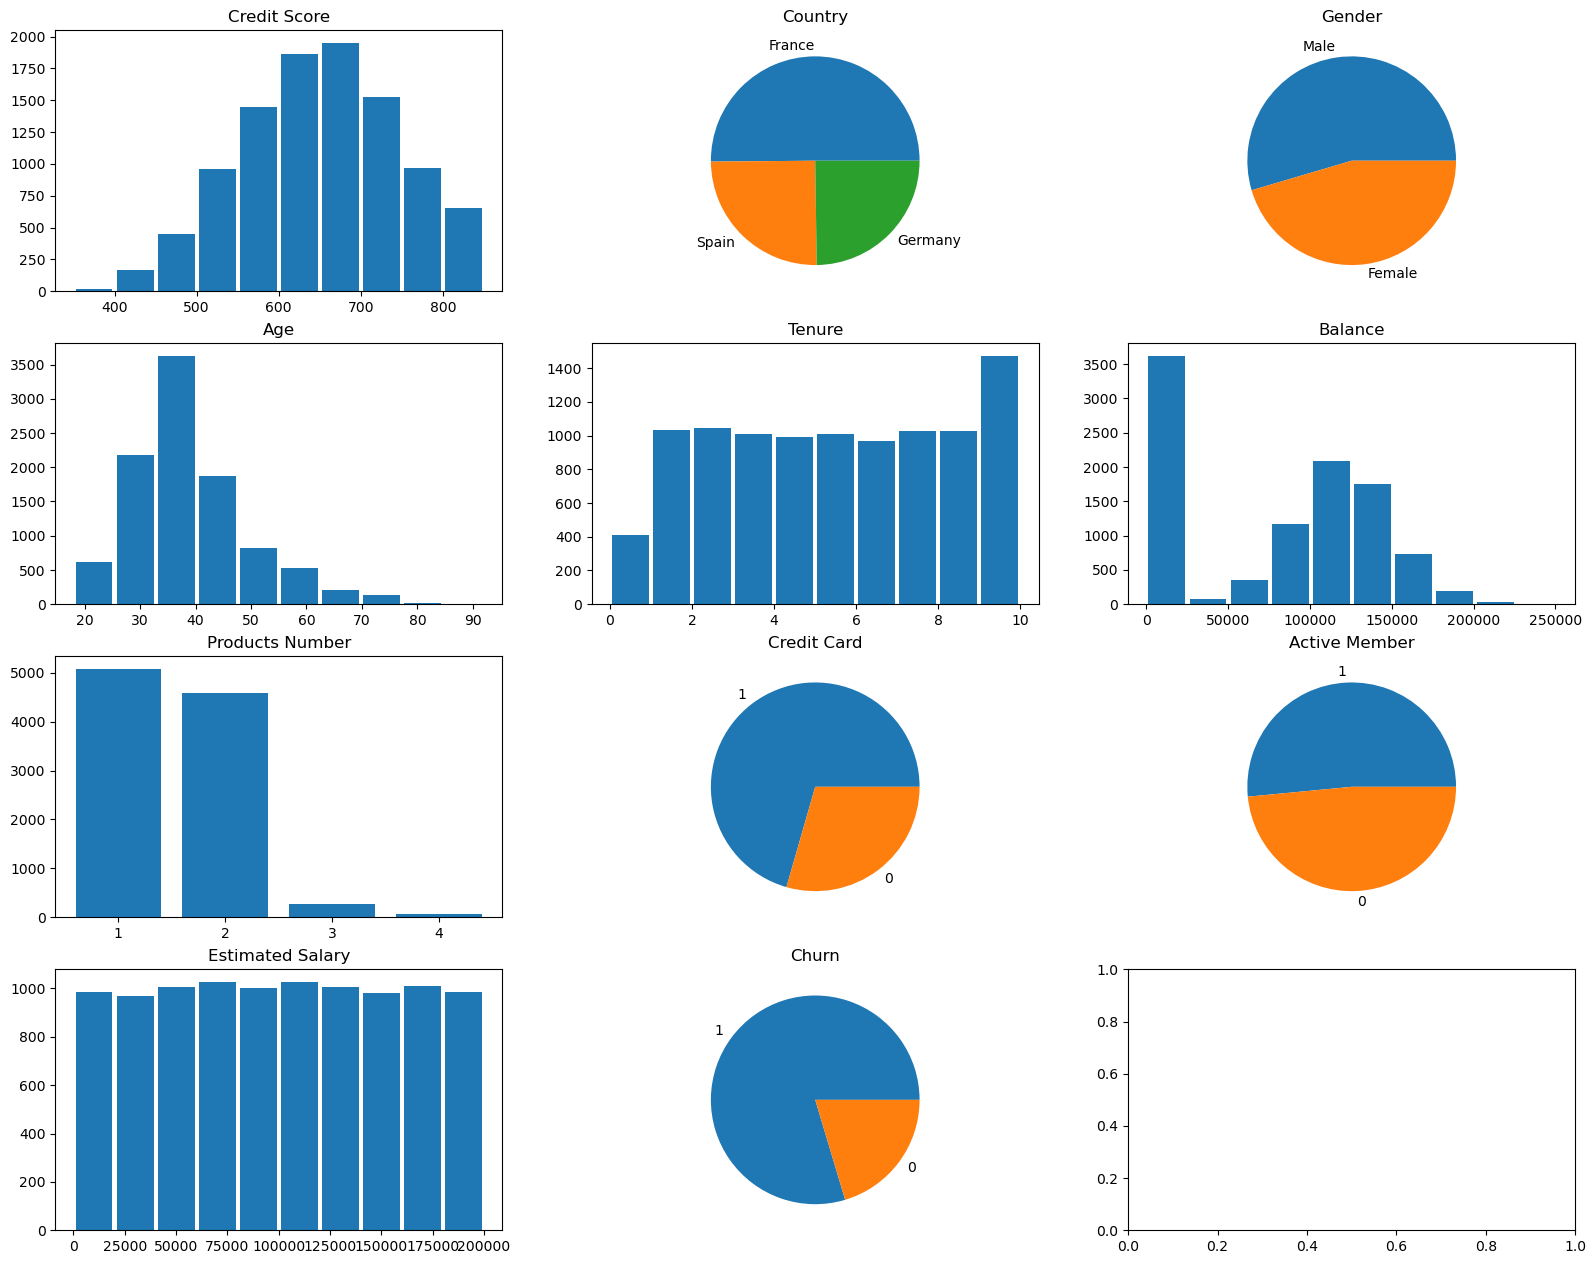

In [59]:
fig, ax = plt.subplots(4, 3)
plt.subplots_adjust(bottom=1, right=2.5, top=3.5)

ax[0, 0].hist(df['credit_score'], rwidth=0.9)
ax[0, 0].title.set_text("Credit Score")

ax[0, 1].pie(df['country'].value_counts(), labels=["France", "Spain", "Germany"])
ax[0, 1].title.set_text("Country")

ax[0, 2].pie(df['gender'].value_counts(), labels=["Male", "Female"])
ax[0, 2].title.set_text("Gender")

ax[1, 0].hist(df['age'], rwidth=0.9)
ax[1, 0].title.set_text("Age")

ax[1, 1].hist(df['tenure'], rwidth=0.9)
ax[1, 1].title.set_text("Tenure")

ax[1, 2].hist(df['balance'], rwidth=0.9)
ax[1, 2].title.set_text("Balance")

ax[2, 0].bar(["1", "2", "3", "4"], df['products_number'].value_counts())
ax[2, 0].title.set_text("Products Number")

ax[2, 1].pie(df['credit_card'].value_counts(), labels=['1', '0'])
ax[2, 1].title.set_text("Credit Card")

ax[2, 2].pie(df['active_member'].value_counts(), labels=['1', '0'])
ax[2, 2].title.set_text("Active Member")

ax[3, 0].hist(df['estimated_salary'], rwidth=0.9)
ax[3, 0].title.set_text("Estimated Salary")

ax[3, 1].pie(df['churn'].value_counts(), labels=['1', '0'])
ax[3, 1].title.set_text("Churn")

## Preprocessing Data

### Data Transformation

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

## Data Normalization

In [65]:
from sklearn.preprocessing import MinMaxScaler

X = np.array(df.iloc[:, 1:-1])
y = np.array(df.iloc[:, -1])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)